In [56]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import statistics as stat

In [3]:
df = pd.read_csv("iris.data", header=None)
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','Species']
actual_class = df["Species"]
print(actual_class.value_counts())
data=df.drop(columns=["Species"]).to_numpy()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


In [22]:
def EuclideanDistance(point1,point2):
    dist=sum((point1-point2)**2)**0.5
    return dist

def KMeans(data,k):
    centroids={}
    for i in range(k):
        centroids[i]=data[(i*20)+5]
    pred_class={}
    
    while True:
        pred_class={}
        for i in range(k):
            pred_class[i]=[]

        for point in data: 
            distances=[]
            for centroid in centroids:
                dist=EuclideanDistance(point,centroids[centroid])
                distances.append(dist)

            minDist=min(distances)
            minDistIdx=distances.index(minDist)
            pred_class[minDistIdx].append(point)

        oldCentroid=dict(centroids)
        for i in pred_class:
            classData=pred_class[i]
            newCent=np.mean(classData,axis=0)
            centroids[i]=newCent

        flag=True
        for centroid in oldCentroid:
            oldCent=oldCentroid[centroid]
            currCent=centroids[centroid]
            if np.sum((currCent-oldCent)/oldCent*100)>0.001:
                flag=False
        if flag:
            break

    return centroids,pred_class

In [23]:
centroids,pred_class=KMeans(data,3)
print(len(pred_class[0]))
print(len(pred_class[1]))
print(len(pred_class[2]))

39
61
50


In [24]:

c1 = np.array(pred_class[0])
c1 = c1.reshape(len(pred_class[0]),4)
c2 = np.array(pred_class[1])
c2 = c2.reshape(len(pred_class[1]),4)
c3 = np.array(pred_class[2])
c3 = c3.reshape(len(pred_class[2]),4)

In [25]:
data.shape

(150, 4)

In [42]:
miss_1 = 0
miss_2 = 0
miss_3 = 0
guessed_data = [None]*150
for i in range(data.shape[0]):
    if list(data[i]) in c1.tolist():
        guessed_data[i] = 'Iris-virginica'
        if actual_class[i] != 'Iris-virginica':
            miss_1+=1
    if list(data[i]) in c2.tolist():
        guessed_data[i] = 'Iris-versicolor'
        if actual_class[i] != 'Iris-versicolor':
            miss_2+=1
    if list(data[i]) in c3.tolist():
        guessed_data[i] = 'Iris-setosa'
        if actual_class[i] != 'Iris-setosa':
            miss_3+=1

In [50]:
actual_data = list(actual_class)

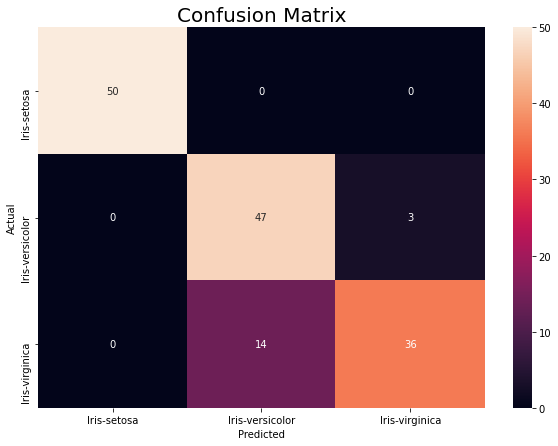

In [57]:
y_actu = pd.Series(actual_data, name='Actual')
y_pred = pd.Series(guessed_data, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix', fontsize = 20)
sn.heatmap(df_confusion, annot=True)
plt.show()

In [60]:
# Calculation of metrics

In [64]:
s_tp = 50
s_tn = 47+3+14+36
s_fp = 0
s_fn = 0
vc_tp = 47
vc_tn = 50+36
vc_fp = 14
vc_fn = 3
v_tp = 36
v_tn = 50+47
v_fp = 3
v_fn = 14

In [70]:
s_accuracy = 100*(s_tp+s_tn)/(150)
s_precision = s_tp/(s_fp + s_tp)
s_recall = s_tp/(s_fn + s_tp)
s_f1score = 2*s_precision*s_recall/(s_precision+s_recall)

vc_accuracy = 100*(vc_tp+vc_tn)/(150)
vc_precision = vc_tp/(vc_fp + vc_tp)
vc_recall = vc_tp/(vc_fn + vc_tp)
vc_f1score = 2*vc_precision*vc_recall/(vc_precision+vc_recall)

v_accuracy = 100*(v_tp+v_tn)/(150)
v_precision = v_tp/(v_fp + v_tp)
v_recall = v_tp/(v_fn + v_tp)
v_f1score = 2*vc_precision*vc_recall/(vc_precision+vc_recall)

In [73]:
# Printing the final results
print("---------------------------")
print("Iris-setosa")
print()
print("Accuracy :", s_accuracy, "%")
print("Precision :", s_precision*100, "%")
print("Recall :", s_recall*100, "%")
print("f1score :", s_f1score)
print("---------------------------")
print()
print("Iris-versicolor")
print()
print("Accuracy :", vc_accuracy, "%")
print("Precision :", vc_precision*100, "%")
print("Recall :", vc_recall*100, "%")
print("f1score :", vc_f1score)
print("---------------------------")
print()
print("Iris-virginica")
print()
print("Accuracy :", v_accuracy, "%")
print("Precision :", v_precision*100, "%")
print("Recall :", v_recall*100, "%")
print("f1score :", v_f1score)
print("---------------------------")

---------------------------
Iris-setosa

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
f1score : 1.0
---------------------------

Iris-versicolor

Accuracy : 88.66666666666667 %
Precision : 77.04918032786885 %
Recall : 94.0 %
f1score : 0.8468468468468469
---------------------------

Iris-virginica

Accuracy : 88.66666666666667 %
Precision : 92.3076923076923 %
Recall : 72.0 %
f1score : 0.8468468468468469
---------------------------
